#Alunos
Lucas de Almeida Carvalho,
Marcelo Silva,
Emiliano Maresca,

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import math
import skimage.feature as feature
import zipfile
import glob

In [2]:
!mkdir treino

In [3]:
!mkdir teste

In [4]:
!wget https://github.com/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip?raw=true -O basesimpsons.zip
!unzip basesimpsons.zip

--2022-11-20 17:47:10--  https://github.com/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip [following]
--2022-11-20 17:47:11--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip [following]
--2022-11-20 17:47:11--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2008%20-%20Classification/basesimpsons.zip
Re

In [5]:
#Extração da base de treino para a pasta Treino
with zipfile.ZipFile('Treino.zip','r') as zip_ref:
  zip_ref.extractall('treino')

In [6]:
#Extração da base de treino para a pasta Teste
with zipfile.ZipFile('Teste.zip','r') as zip_ref:
  zip_ref.extractall('teste')

##Funções e carregamento de base


In [7]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [8]:
def performance_evaluation(y_test, predictions,info_message):
  
  print(f"Evaluation of ", info_message)
  print(f"{metrics.classification_report(y_test, predicted)}\n")
  print(lbls_name)
  disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
  disp.figure_.suptitle("Confusion Matrix")
  plt.show()

  id = np.random.randint(300)
  idx1,idx2=id,id+10  
  diff = y_test - predictions  
  idxs = np.where(diff == 0)
  
  _, axes = plt.subplots(nrows=1, ncols=(idx2-idx1), figsize=(20, 10))
  for ax, image, lbl, prediction, in zip(axes, X_test[idxs],y_test[idxs], predictions[idxs]):
      ax.set_axis_off()      
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
      ax.set_title(f"Lbl: {lbl} Pred: {prediction}")
  
      
  idxs = np.where(diff != 0)
  _, axes = plt.subplots(nrows=1, ncols=(idx2-idx1), figsize=(20, 10))
  for ax, image, lbl, prediction, in zip(axes, X_test[idxs],y_test[idxs], predictions[idxs]):
      ax.set_axis_off()      
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
      ax.set_title(f"Lbl: {lbl} Pred: {prediction}")

  plt.show()

In [9]:
def plot_features(pca_features,labels,title='PCA Plot',figsize=(12,8)):
  
  plt.figure(figsize=figsize)
  x, y = zip(*pca_features)
  plt.scatter(x, y)

  for i in range(len(x)):  
    plt.text(x=x[i], y=y[i], s=labels[i])
  
  plt.title(title)
  plt.show()

In [10]:
def categorical_label(name):
  if name == 'homer':
    id = 0
  elif name == 'marge':
    id = 1
  elif name == 'bart':
    id = 2
  elif name == 'lisa':
    id = 3
  elif name == 'maggie':
    id = 4
  else:
    id = 5
  return id

lbls_name = ['homer','marge','bart','lisa','maggie','family']
lbls_nro = [0,1,2,3,4,5]
path_treino = '/content/treino/'
path_teste = '/content/teste/'  

In [11]:
#Carregamento de base treino
import os
file_list=[]
file_list.append(os.listdir(r"/content/treino"))

In [12]:
#Carregamento de base teste
import os
file_list_teste=[]
file_list_teste.append(os.listdir(r"/content/teste"))

In [13]:
X_train = []
y_train = []
for classes_files, classe in zip (file_list, range(5)):
  for i in range(len(classes_files)):
        original = cv2.imread(path_treino+classes_files[i])
        name= str(classes_files[i])
        name = name[0:(len(name)-7)]
        original = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
        original = cv2.resize(original,(200,200), interpolation=cv2.INTER_AREA)
        X_train.append(original)
        id = categorical_label(name)
        y_train.append(id)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [14]:
X_test = []
y_test = []

for classes_files, classe in zip (file_list_teste, range(5)):
  for i in range(len(classes_files)):
        original = cv2.imread(path_teste+classes_files[i])
        name= str(classes_files[i])
        name = name[0:(len(name)-7)]
        original = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
        original = cv2.resize(original,(200,200), interpolation=cv2.INTER_AREA)
        X_test.append(original)
        id = categorical_label(name)
        y_test.append(id)
X_test = np.array(X_test)
y_test = np.array(y_test)

## Plot Samples

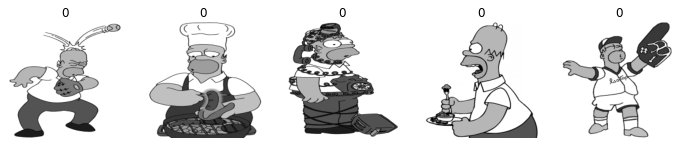

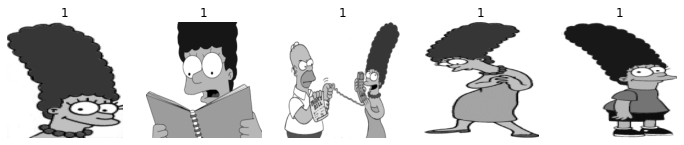

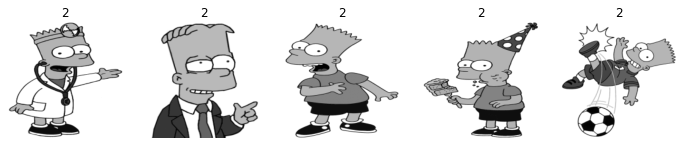

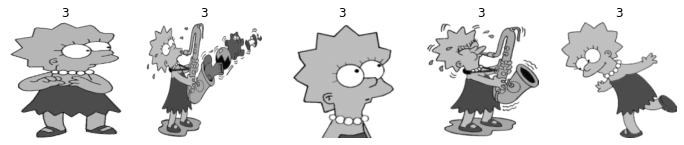

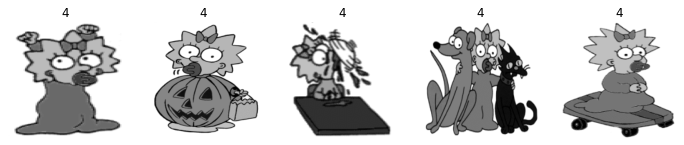

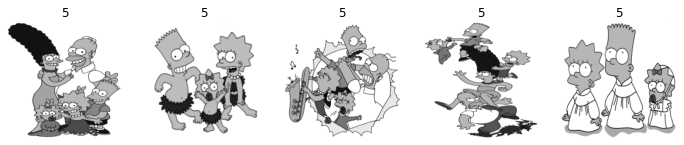

In [15]:
N_CLASSES = 6
N_SAMPLES = 5
for i in range(N_CLASSES):
  idxs = np.where(y_train == i)[0]
  idxs = idxs[:N_SAMPLES]
  plot_sidebyside(X_train[idxs],y_train[idxs],'gray')

#Descritores



#Projeção Horizontal e Vertical
Extração de caracteristicas de projeção Vertical, Horizontal e ambas combinadas

In [16]:
def extract_projection(data,axis=0):
  features = []
  for d in data:
    height, width = d.shape
    _,d = cv2.threshold(d,127,255,cv2.THRESH_BINARY)

    if axis < 2:
      proj = np.sum(d, axis=axis)
      proj = proj/255
    else:
      proj0 = np.sum(d, axis=0)
      proj1 = np.sum(d, axis=1)       
      proj = np.concatenate([proj0,proj1],axis = 0)/255
  
    features.append(proj)
    

  return np.array(features)

train_feat_v = extract_projection(X_train,axis=0)
test_feat_v = extract_projection(X_test,axis=0)

train_feat_h = extract_projection(X_train,axis=1)
test_feat_h = extract_projection(X_test,axis=1)

train_feat_hv = extract_projection(X_train,axis=2)
test_feat_hv = extract_projection(X_test,axis=2)

  

Visualização do histograma das projeções extraídas.

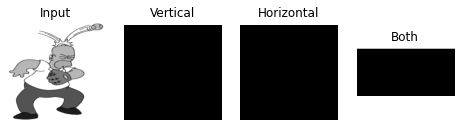

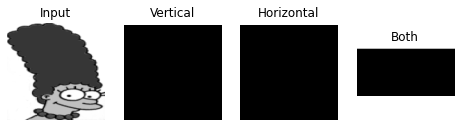

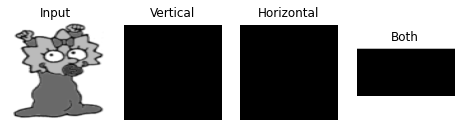

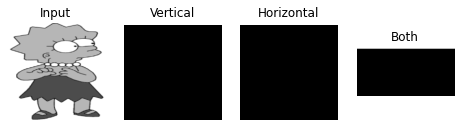

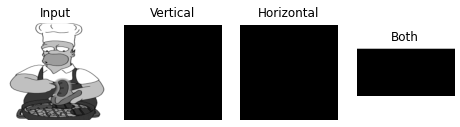

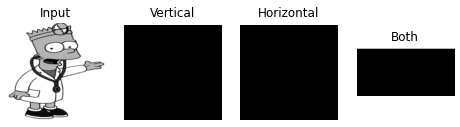

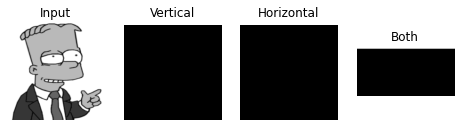

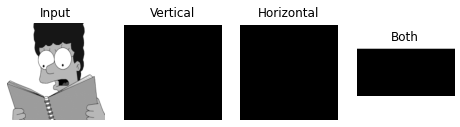

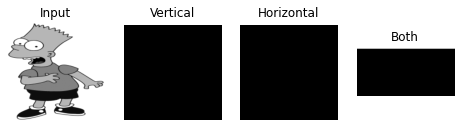

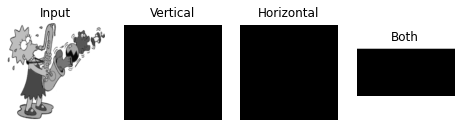

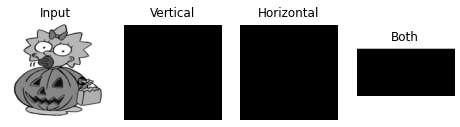

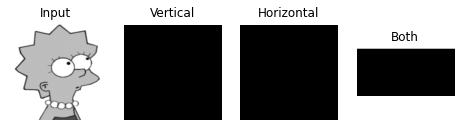

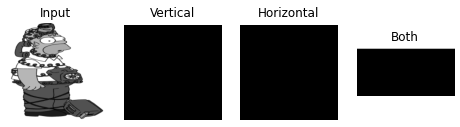

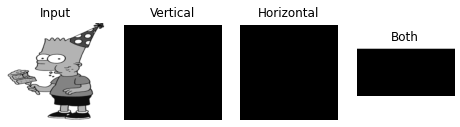

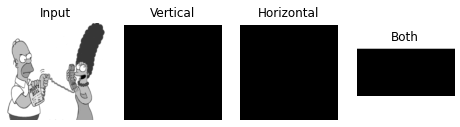

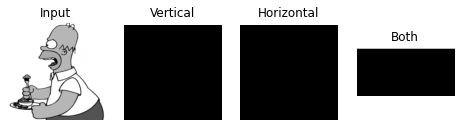

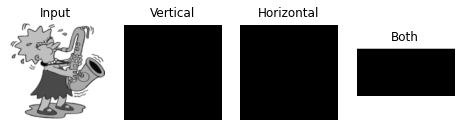

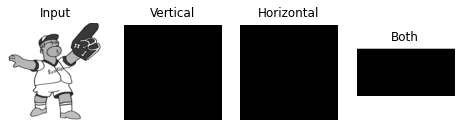

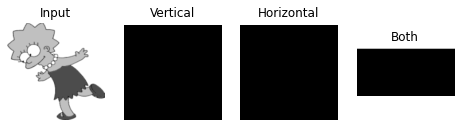

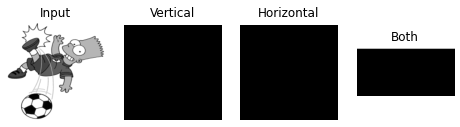

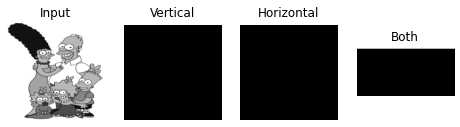

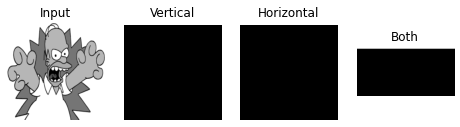

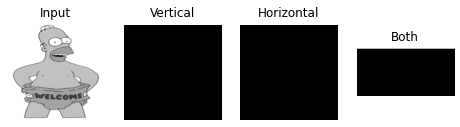

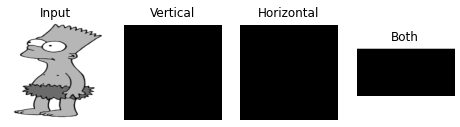

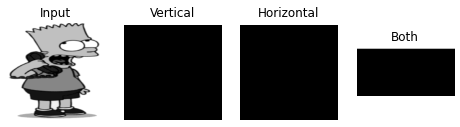

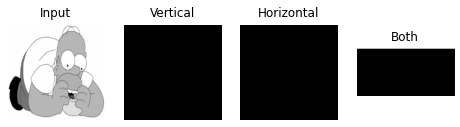

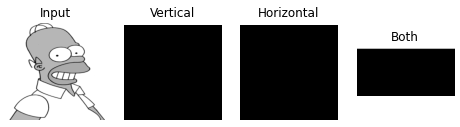

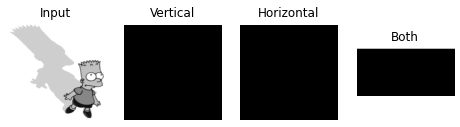

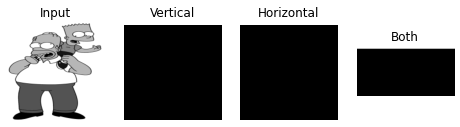

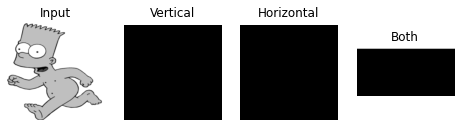

In [24]:
 for vert,horiz,both,img in zip(train_feat_v[:30],train_feat_h[:30],train_feat_hv[:30],X_train[:30]): 
  
  # create a black image with zeros 
  vert_proj = np.zeros((28,28),dtype=np.uint8)
  horiz_proj = np.zeros((28,28),dtype=np.uint8)
  both_proj = np.zeros((28,56),dtype=np.uint8)
  
  height = 28
  
  # Make the vertical projection histogram
  for idx, value in enumerate(vert):
      cv2.line(vert_proj, (idx, 0), (idx, height-int(value)), (255,255,255), 1)

  for idx, value in enumerate(horiz):
      cv2.line(horiz_proj, (idx, 0), (idx, height-int(value)), (255,255,255), 1)
  
  for idx, value in enumerate(both):      
      cv2.line(both_proj, (idx, 0), (idx, height-int(value)), (255,255,255), 1)

  
  plot_sidebyside([img,vert_proj,horiz_proj,both_proj],['Input','Vertical','Horizontal','Both'],'gray',(8,8))

#Canny, Sobel e Laplace
Extração das caracteristicas através das técnicas Canny, Sobel e Laplace

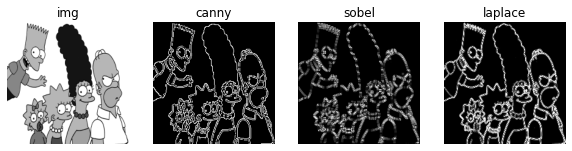

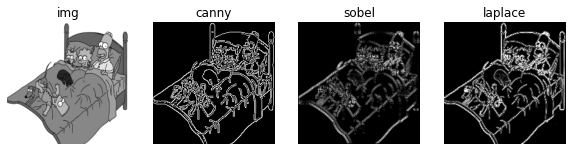

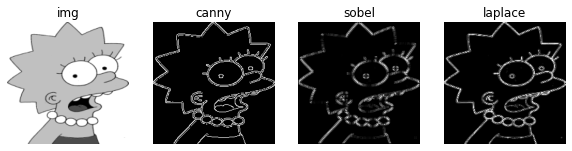

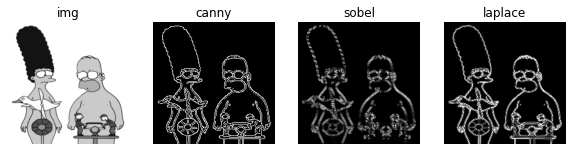

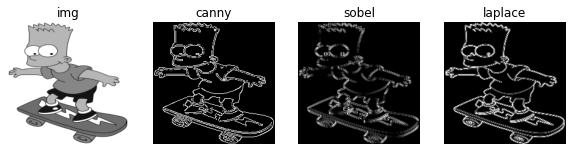

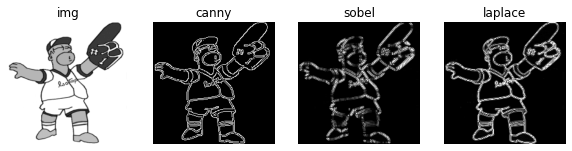

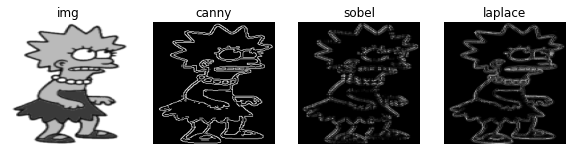

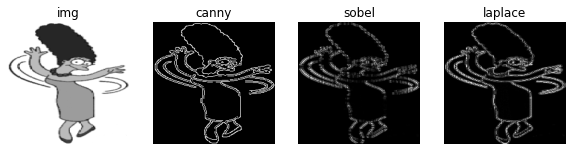

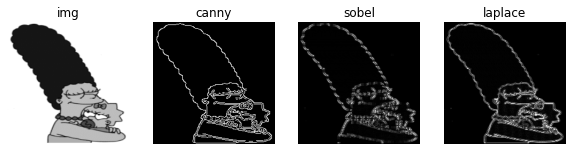

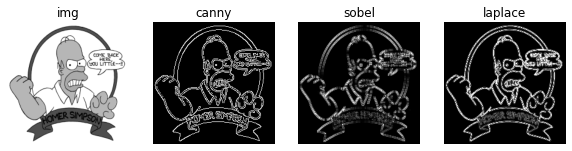

In [ ]:
def extract_edges(data,algorithm='canny'):
  features = []
  
  for img in data:
    if algorithm=='canny':
      edges = cv2.Canny(img,100,200)      
    
    elif algorithm=='sobel':
                                      #V H 
      edges = cv2.Sobel(img,cv2.CV_64F,1,1)
      #Back to UINT8
      edges = cv2.convertScaleAbs(edges) 

    elif algorithm=='laplace':
      edges = cv2.Laplacian(img,cv2.CV_64F)
      #Back to UINT8
      edges = cv2.convertScaleAbs(edges)                     
    
    features.append(edges)

  return np.array(features)

train_feat_canny = extract_edges(X_train,'canny')
test_feat_canny = extract_edges(X_test,'canny')

train_feat_sobel = extract_edges(X_train,'sobel')
test_feat_sobel = extract_edges(X_test,'sobel')

train_feat_laplace = extract_edges(X_train,'laplace')
test_feat_laplace = extract_edges(X_test,'laplace')

for canny,sobel,laplace,img in zip(train_feat_canny[:10],train_feat_sobel[:10],train_feat_laplace[:10],X_train[:10]): 
  plot_sidebyside([img,canny,sobel,laplace],['img','canny','sobel','laplace'],'gray',figsize=(10,6))

#LBP
Extração de caracteristicas usando a técnicas LBP

In [ ]:
class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    if len(image.shape) > 2 and image.shape[2] == 3:
      image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    lbp_img = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp_img.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp_img

In [ ]:
desc = LocalBinaryPatterns(8, 2)
lbp_hist_train = []
lbp_hist_test = []
lbp_img_train = []
lbp_img_test = []
for img in X_train:
  hist, lbp_img = desc.describe(img)
  lbp_hist_train.append(hist)
  lbp_img_train.append(hist)


for img in X_test:
  hist, lbp_img = desc.describe(img)
  lbp_hist_test.append(hist)
  lbp_img_test.append(hist)

lbp_htrain = np.array(lbp_hist_train)
lbp_htest = np.array(lbp_hist_test)
lbp_imtrain = np.array(lbp_img_train)
lbp_imtest = np.array(lbp_img_test)

print(lbp_htrain.shape)
print(lbp_htest.shape)
print(lbp_imtrain.shape)
print(lbp_imtest.shape)

(253, 10)
(106, 10)
(253, 10)
(106, 10)


#HOG
Extração de caracteristicas usando a técnica HOG

In [ ]:
class HOG:
  def describe(self,im,pixels_per_cell=(8, 8),cells_per_block=(2, 2)):
    if len(im.shape) > 2 and im.shape[2] == 3:
      im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

    im = cv2.resize(im,(64,128))

    fd, hog_image = feature.hog(im, orientations=9, pixels_per_cell=pixels_per_cell,
                	cells_per_block=(2, 2),visualize=True)
    return fd,hog_image

In [ ]:
desc = HOG()
HOG_train = []
HOG_test = []
for img in X_train:
  key_pts, hog_img = desc.describe(img)
  HOG_train.append(key_pts)

for img in X_test:
  key_pts, hog_img = desc.describe(img)
  HOG_test.append(key_pts)   


Hog_train = np.array(HOG_train)
Hog_test = np.array(HOG_test)

print(Hog_train.shape)
print(Hog_test.shape)

(253, 3780)
(106, 3780)


# Visualização das distribuições com PCA

Vamos comparar o espaço de caraterísticas dos diferentes descritores, utilizando PCA. Abaixo a função 'pca_FitAndPlot' projeta as amostras/classes

In [ ]:
def pca_FitAndPlot(data,labels,title='PCA Plot',figsize=(10,6)):
  pca_features = PCA(n_components=2).fit_transform(data)  

  plt.figure(figsize=figsize)
  x, y = zip(*pca_features)
  plt.scatter(x, y)

  for i in range(len(x)):  
    plt.text(x=x[i], y=y[i], s=labels[i])
  
  plt.title(title)
  plt.show()

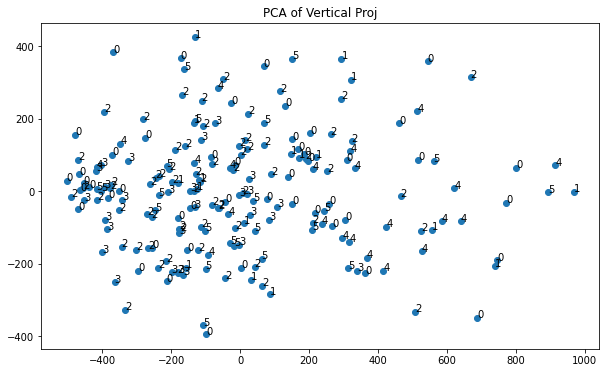

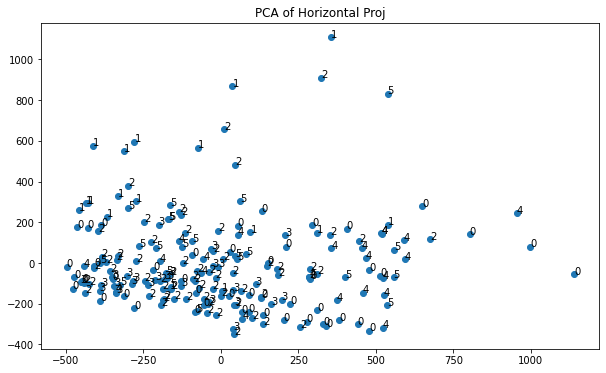

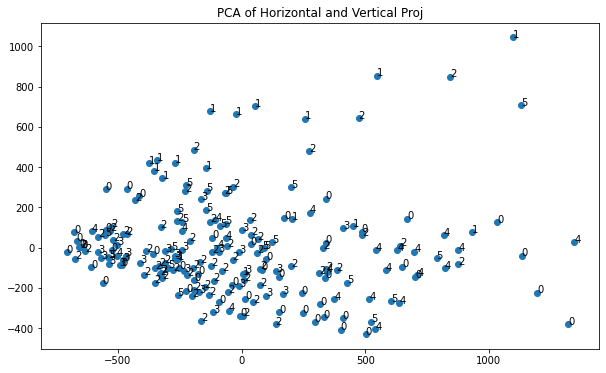

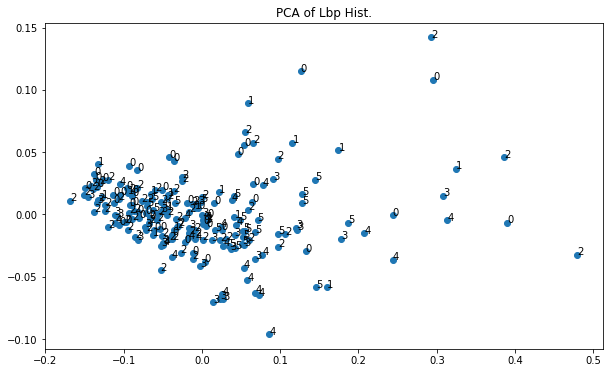

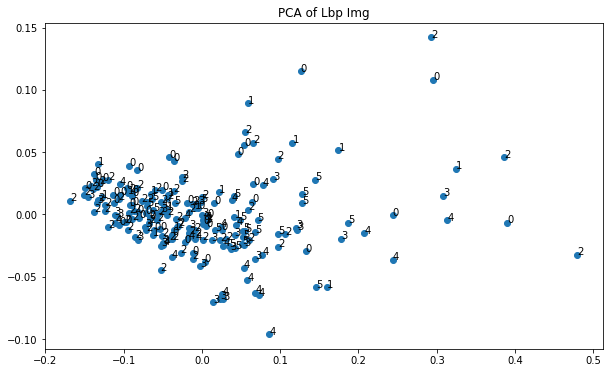

In [ ]:
amount = 200
data = train_feat_v[:amount]
pca_FitAndPlot(data,y_train,'PCA of Vertical Proj')

data = train_feat_h[:amount]
pca_FitAndPlot(data,y_train,'PCA of Horizontal Proj')

data = train_feat_hv[:amount]
pca_FitAndPlot(data,y_train,'PCA of Horizontal and Vertical Proj')

data = lbp_htrain[:amount]
pca_FitAndPlot(data,y_train,'PCA of Lbp Hist.')

data = lbp_imtrain[:amount]
pca_FitAndPlot(data,y_train,'PCA of Lbp Img')


#Teste com Classificadores - KNN

##Teste KNN Horizontal e Vertical

Processing  Horizontal Proj
(253, 200) (106, 200)
Evaluation of  Horizontal Proj
              precision    recall  f1-score   support

           0       0.27      0.52      0.35        25
           1       0.57      0.40      0.47        10
           2       0.50      0.37      0.43        35
           3       0.18      0.15      0.17        13
           4       0.67      0.33      0.44        12
           5       0.57      0.36      0.44        11

    accuracy                           0.38       106
   macro avg       0.46      0.36      0.38       106
weighted avg       0.44      0.38      0.38       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


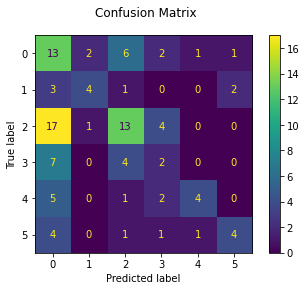

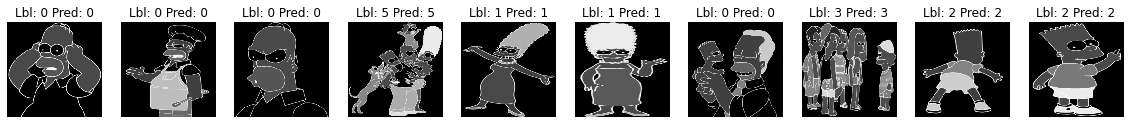

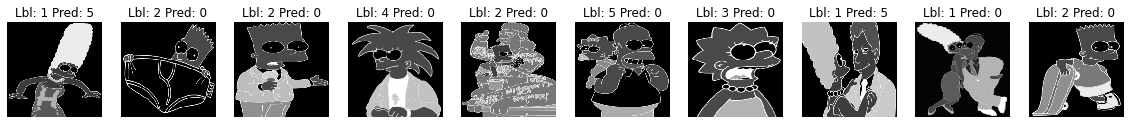

Processing  Vertical Proj
(253, 200) (106, 200)
Evaluation of  Vertical Proj
              precision    recall  f1-score   support

           0       0.31      0.44      0.36        25
           1       0.25      0.10      0.14        10
           2       0.47      0.54      0.51        35
           3       0.18      0.15      0.17        13
           4       0.44      0.33      0.38        12
           5       0.50      0.27      0.35        11

    accuracy                           0.38       106
   macro avg       0.36      0.31      0.32       106
weighted avg       0.38      0.38      0.37       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


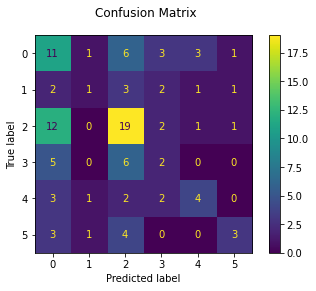

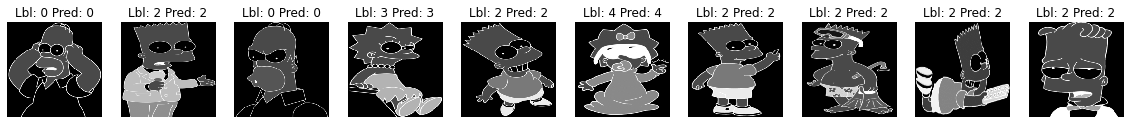

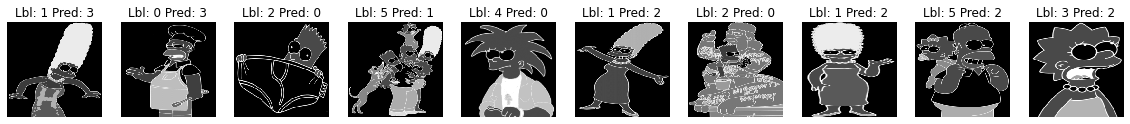

Processing  Both
(253, 400) (106, 400)
Evaluation of  Both
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        25
           1       0.67      0.40      0.50        10
           2       0.44      0.49      0.46        35
           3       0.17      0.15      0.16        13
           4       0.80      0.33      0.47        12
           5       0.29      0.18      0.22        11

    accuracy                           0.36       106
   macro avg       0.43      0.32      0.35       106
weighted avg       0.40      0.36      0.36       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


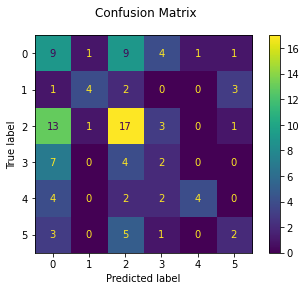

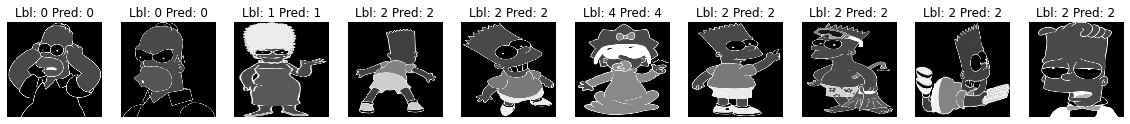

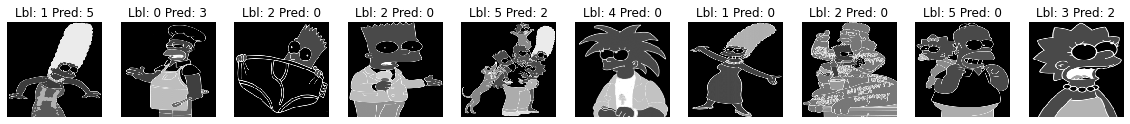

In [ ]:
K = 7
train_data = [train_feat_h,train_feat_v,train_feat_hv]
test_data = [test_feat_h,test_feat_v,test_feat_hv]
data_info = ['Horizontal Proj', 'Vertical Proj', 'Both']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  knn = KNeighborsClassifier(n_neighbors=K)
    
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)


  print(train.shape, test.shape)
  knn.fit(train, y_train)
  predicted = knn.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste KNN Canny, Sobel e Laplace

Processing  Canny
(253, 40000) (106, 40000)
Evaluation of  Canny
              precision    recall  f1-score   support

           0       0.25      0.84      0.39        25
           1       0.10      0.20      0.13        10
           2       1.00      0.03      0.06        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.23       106
   macro avg       0.23      0.18      0.10       106
weighted avg       0.40      0.23      0.12       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


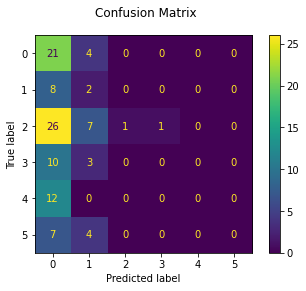

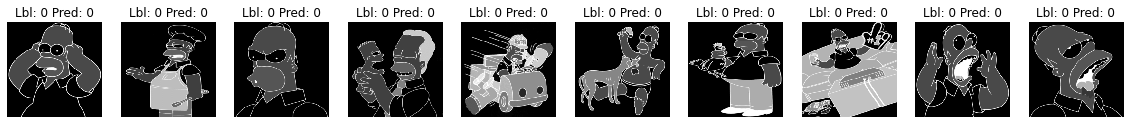

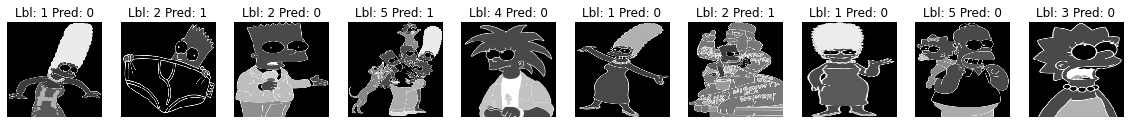

Processing  Sobel
(253, 40000) (106, 40000)
Evaluation of  Sobel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        13
           4       0.12      1.00      0.21        12
           5       0.00      0.00      0.00        11

    accuracy                           0.11       106
   macro avg       0.02      0.17      0.03       106
weighted avg       0.01      0.11      0.02       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


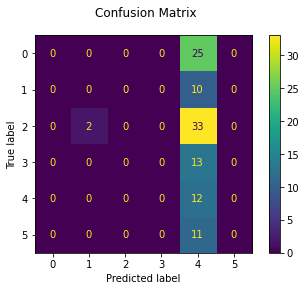

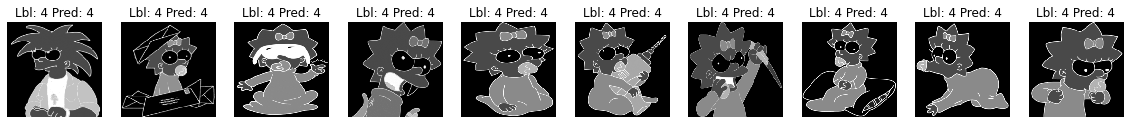

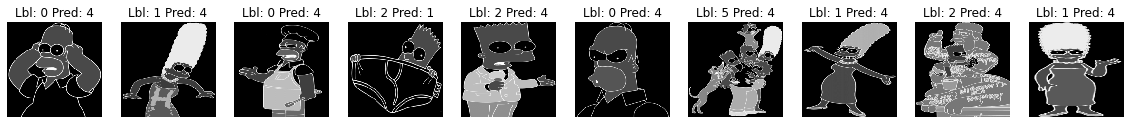

Processing  Laplace
(253, 40000) (106, 40000)
Evaluation of  Laplace
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.14      0.30      0.19        10
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        13
           4       0.11      0.75      0.19        12
           5       0.00      0.00      0.00        11

    accuracy                           0.11       106
   macro avg       0.04      0.18      0.06       106
weighted avg       0.03      0.11      0.04       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


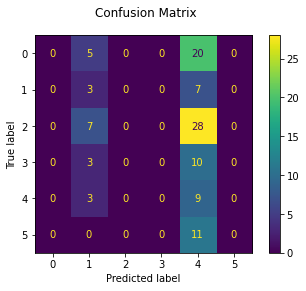

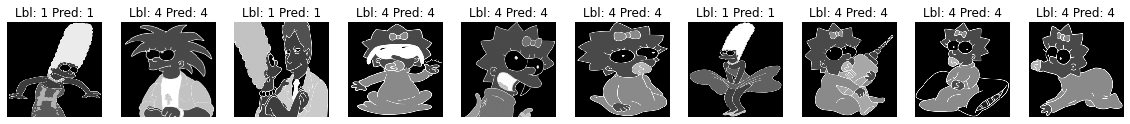

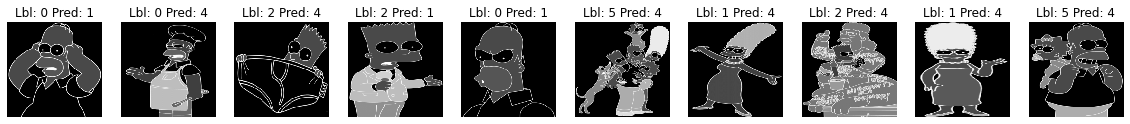

In [ ]:
K=7
train_data = [train_feat_canny,train_feat_sobel,train_feat_laplace]
test_data = [test_feat_canny,test_feat_sobel,test_feat_laplace]
data_info = ['Canny','Sobel','Laplace']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info)
  knn = KNeighborsClassifier(n_neighbors=K)  
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  knn.fit(train, y_train)
  predicted = knn.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste KNN LBP

Processing  LBP Histograma
(253, 10) (106, 10)
Evaluation of  LBP Histograma
              precision    recall  f1-score   support

           0       0.22      0.40      0.29        25
           1       0.20      0.10      0.13        10
           2       0.32      0.37      0.34        35
           3       0.25      0.08      0.12        13
           4       0.33      0.08      0.13        12
           5       0.12      0.09      0.11        11

    accuracy                           0.25       106
   macro avg       0.24      0.19      0.19       106
weighted avg       0.26      0.25      0.23       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


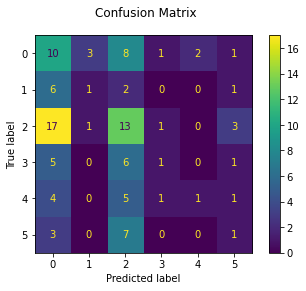

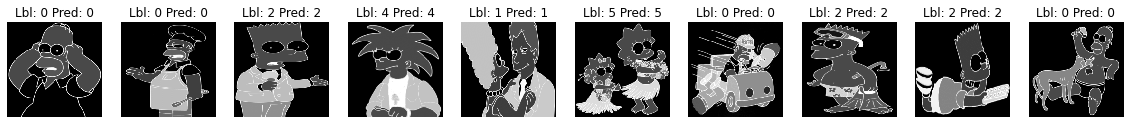

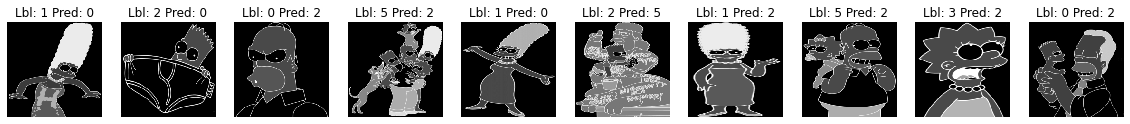

In [ ]:
K = 7
train_data = [lbp_htrain]
test_data = [lbp_htest]
data_info = ['LBP Histograma']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  knn = KNeighborsClassifier(n_neighbors=K)
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  knn.fit(train, y_train)
  predicted = knn.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste KNN HOG

Processing  HOG Extraction
(253, 3780) (106, 3780)
Evaluation of  HOG Extraction
              precision    recall  f1-score   support

           0       0.35      0.24      0.29        25
           1       0.00      0.00      0.00        10
           2       0.59      0.46      0.52        35
           3       1.00      0.23      0.38        13
           4       1.00      0.08      0.15        12
           5       0.19      1.00      0.32        11

    accuracy                           0.35       106
   macro avg       0.52      0.34      0.27       106
weighted avg       0.53      0.35      0.33       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


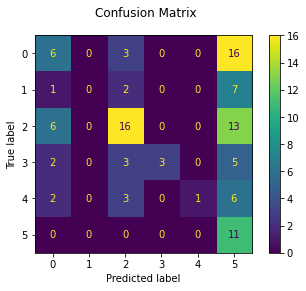

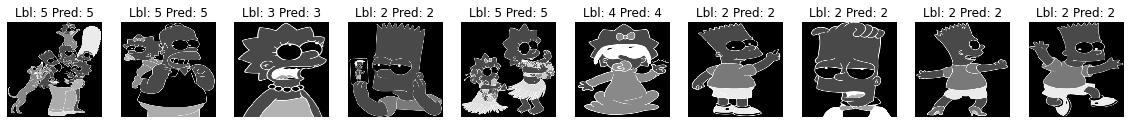

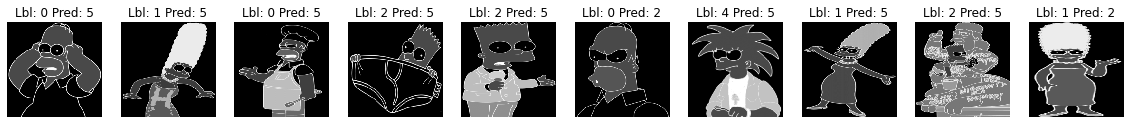

In [ ]:
K = 7
train_data = [Hog_train]
test_data = [Hog_test]
data_info = ['HOG Extraction']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  knn = KNeighborsClassifier(n_neighbors=K)
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  knn.fit(train, y_train)
  predicted = knn.predict(test)
  performance_evaluation(y_test,predicted,info)

#Teste com Classificadores - SVM

##Teste SVM Horizontal e Vertical

Processing  Horizontal Proj
(253, 200) (106, 200)
Evaluation of  Horizontal Proj
              precision    recall  f1-score   support

           0       0.25      0.32      0.28        25
           1       0.83      0.50      0.62        10
           2       0.40      0.63      0.49        35
           3       0.50      0.15      0.24        13
           4       0.67      0.33      0.44        12
           5       1.00      0.27      0.43        11

    accuracy                           0.42       106
   macro avg       0.61      0.37      0.42       106
weighted avg       0.51      0.42      0.41       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


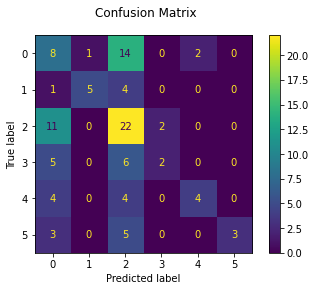

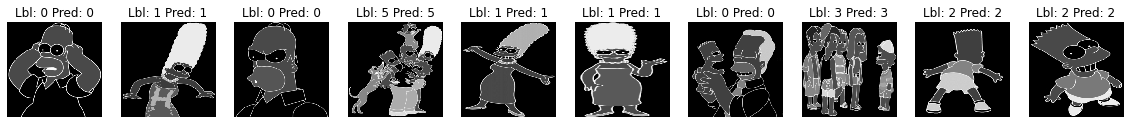

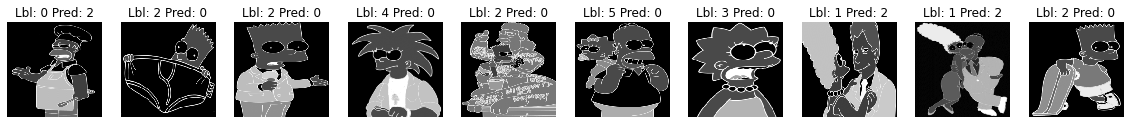

Processing  Vertical Proj
(253, 200) (106, 200)
Evaluation of  Vertical Proj
              precision    recall  f1-score   support

           0       0.37      0.40      0.38        25
           1       0.00      0.00      0.00        10
           2       0.38      0.74      0.50        35
           3       0.00      0.00      0.00        13
           4       0.50      0.33      0.40        12
           5       0.50      0.09      0.15        11

    accuracy                           0.39       106
   macro avg       0.29      0.26      0.24       106
weighted avg       0.32      0.39      0.32       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


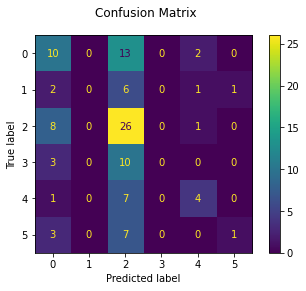

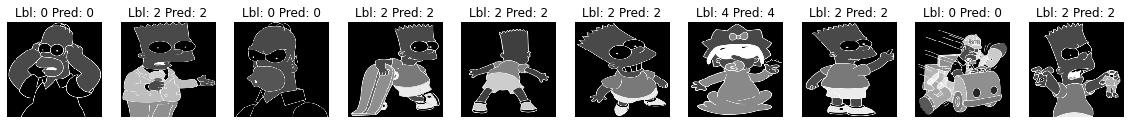

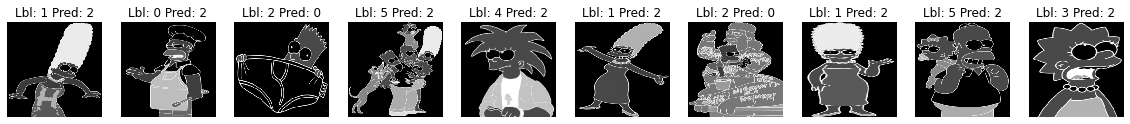

Processing  Both
(253, 400) (106, 400)
Evaluation of  Both
              precision    recall  f1-score   support

           0       0.31      0.44      0.37        25
           1       0.71      0.50      0.59        10
           2       0.45      0.60      0.51        35
           3       0.20      0.08      0.11        13
           4       0.83      0.42      0.56        12
           5       0.50      0.27      0.35        11

    accuracy                           0.43       106
   macro avg       0.50      0.38      0.41       106
weighted avg       0.46      0.43      0.42       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


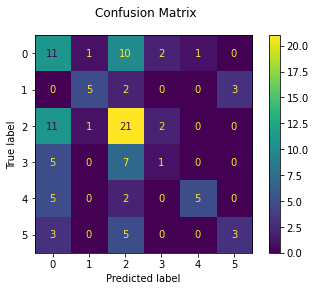

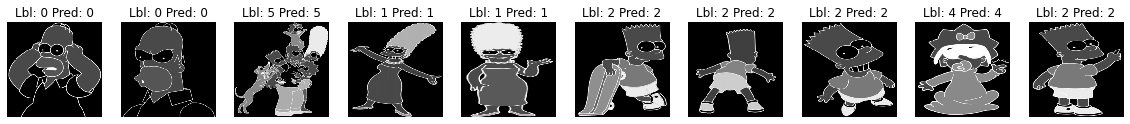

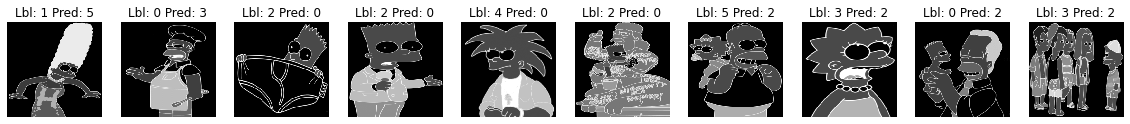

In [ ]:
K = 7
train_data = [train_feat_h,train_feat_v,train_feat_hv]
test_data = [test_feat_h,test_feat_v,test_feat_hv]
data_info = ['Horizontal Proj', 'Vertical Proj', 'Both']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  svm = SVC()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)


  print(train.shape, test.shape)
  svm.fit(train, y_train)
  predicted = svm.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste SVM Canny, Sobel e Laplace

Processing  Canny
(253, 40000) (106, 40000)
Evaluation of  Canny
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        10
           2       0.33      1.00      0.50        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.33       106
   macro avg       0.06      0.17      0.08       106
weighted avg       0.11      0.33      0.16       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


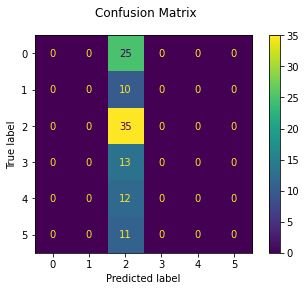

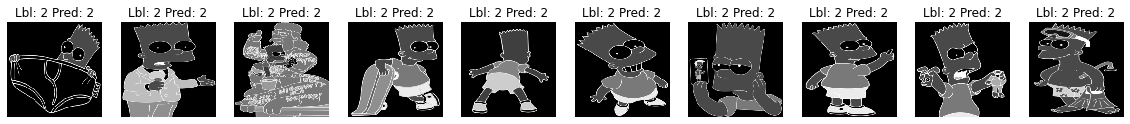

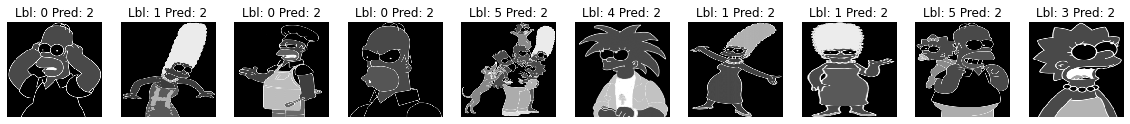

Processing  Sobel
(253, 40000) (106, 40000)
Evaluation of  Sobel
              precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.00      0.00      0.00        10
           2       0.36      1.00      0.53        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.38       106
   macro avg       0.20      0.20      0.14       106
weighted avg       0.31      0.38      0.25       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


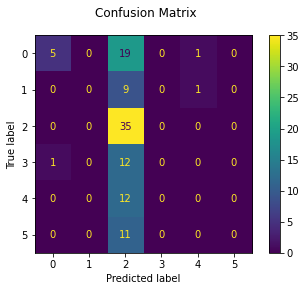

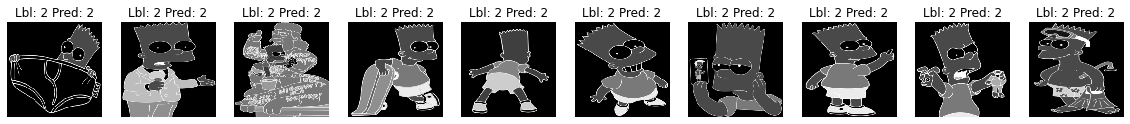

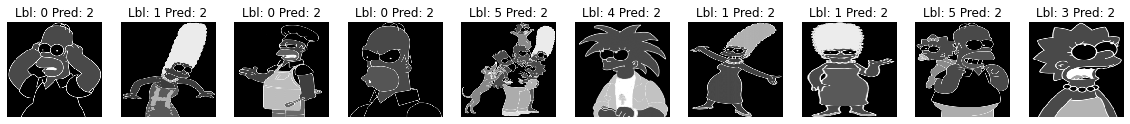

Processing  Laplace
(253, 40000) (106, 40000)
Evaluation of  Laplace
              precision    recall  f1-score   support

           0       0.75      0.12      0.21        25
           1       0.00      0.00      0.00        10
           2       0.35      1.00      0.52        35
           3       0.00      0.00      0.00        13
           4       0.33      0.08      0.13        12
           5       0.00      0.00      0.00        11

    accuracy                           0.37       106
   macro avg       0.24      0.20      0.14       106
weighted avg       0.33      0.37      0.24       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


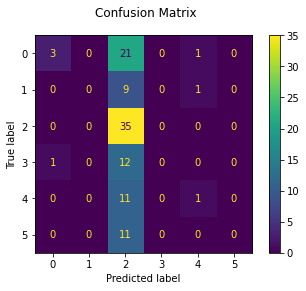

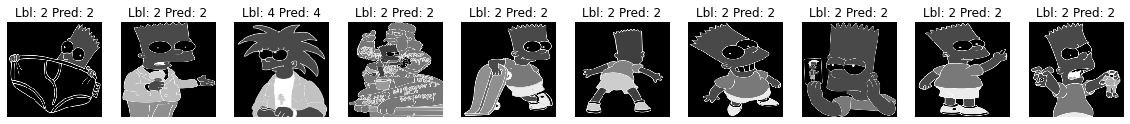

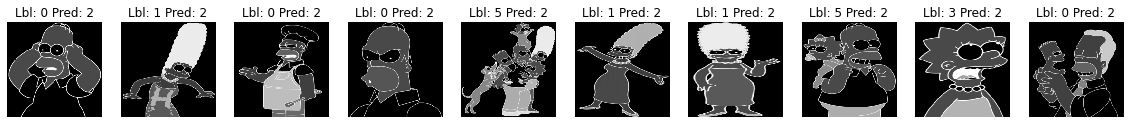

In [ ]:
K=7
train_data = [train_feat_canny,train_feat_sobel,train_feat_laplace]
test_data = [test_feat_canny,test_feat_sobel,test_feat_laplace]
data_info = ['Canny','Sobel','Laplace']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info)
  knn = KNeighborsClassifier(n_neighbors=K)  
  svm = SVC()

  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)


  print(train.shape, test.shape)
  svm.fit(train, y_train)
  predicted = svm.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste SVM LBP

Processing  LBP Histograma
(253, 10) (106, 10)
Evaluation of  LBP Histograma
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        10
           2       0.33      1.00      0.50        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.33       106
   macro avg       0.06      0.17      0.08       106
weighted avg       0.11      0.33      0.16       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


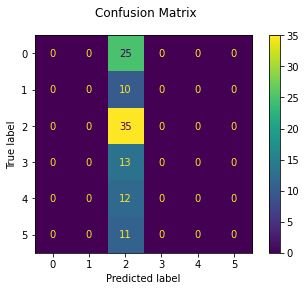

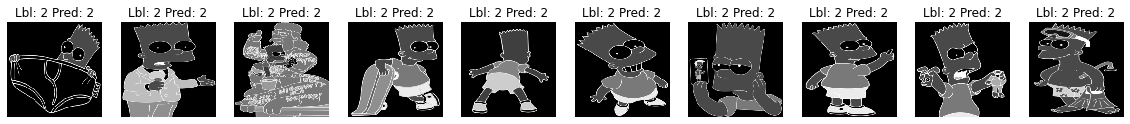

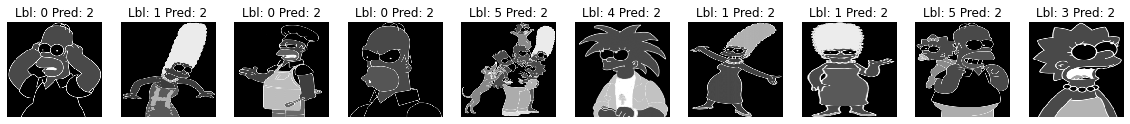

In [ ]:
K = 3
train_data = [lbp_htrain]
test_data = [lbp_htest]
data_info = ['LBP Histograma']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  svm = SVC()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  svm.fit(train, y_train)
  predicted = svm.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste SVM HOG

Processing  HOG Extraction
(253, 3780) (106, 3780)
Evaluation of  HOG Extraction
              precision    recall  f1-score   support

           0       0.78      0.28      0.41        25
           1       0.00      0.00      0.00        10
           2       0.36      0.97      0.52        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       1.00      0.18      0.31        11

    accuracy                           0.41       106
   macro avg       0.36      0.24      0.21       106
weighted avg       0.41      0.41      0.30       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


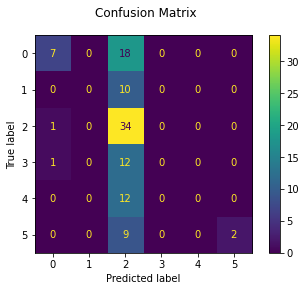

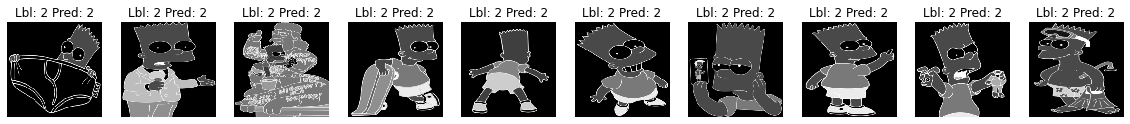

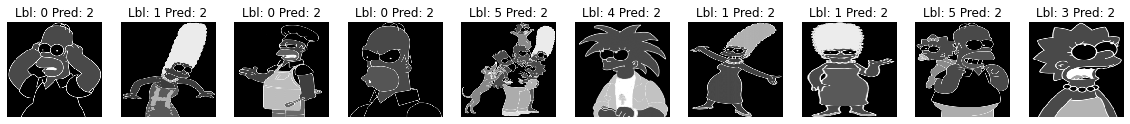

In [ ]:
K = 3
train_data = [Hog_train]
test_data = [Hog_test]
data_info = ['HOG Extraction']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  svm = SVC()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  svm.fit(train, y_train)
  predicted = svm.predict(test)
  performance_evaluation(y_test,predicted,info)

#Teste com Classificadores - RandomForest

##Teste RandomForest Horizontal e Vertical

Processing  Horizontal Proj
(253, 200) (106, 200)
Evaluation of  Horizontal Proj
              precision    recall  f1-score   support

           0       0.32      0.36      0.34        25
           1       0.70      0.70      0.70        10
           2       0.51      0.74      0.60        35
           3       0.25      0.08      0.12        13
           4       0.67      0.33      0.44        12
           5       0.57      0.36      0.44        11

    accuracy                           0.48       106
   macro avg       0.50      0.43      0.44       106
weighted avg       0.48      0.48      0.46       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


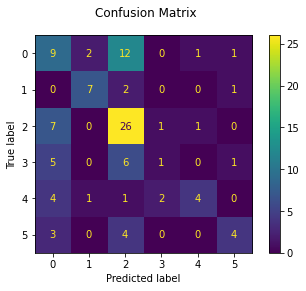

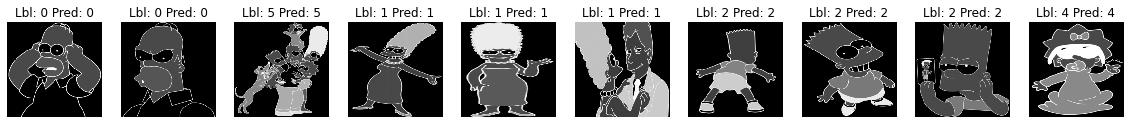

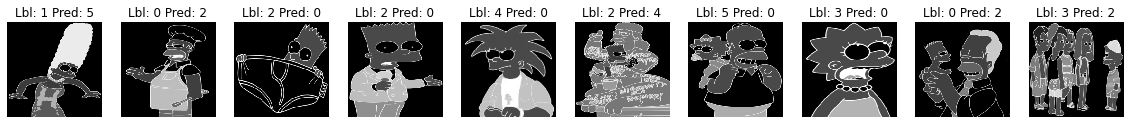

Processing  Vertical Proj
(253, 200) (106, 200)
Evaluation of  Vertical Proj
              precision    recall  f1-score   support

           0       0.41      0.48      0.44        25
           1       0.33      0.10      0.15        10
           2       0.51      0.69      0.59        35
           3       0.17      0.08      0.11        13
           4       0.56      0.42      0.48        12
           5       0.50      0.55      0.52        11

    accuracy                           0.46       106
   macro avg       0.41      0.38      0.38       106
weighted avg       0.43      0.46      0.43       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


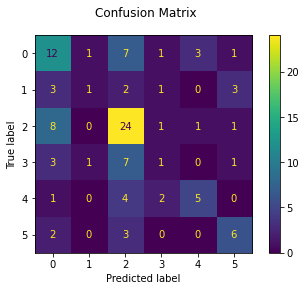

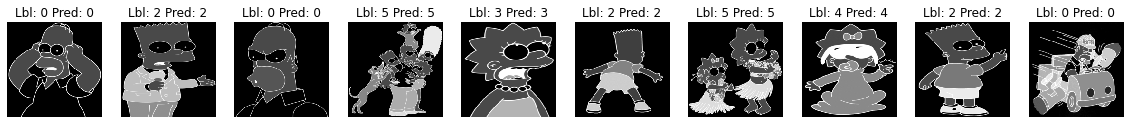

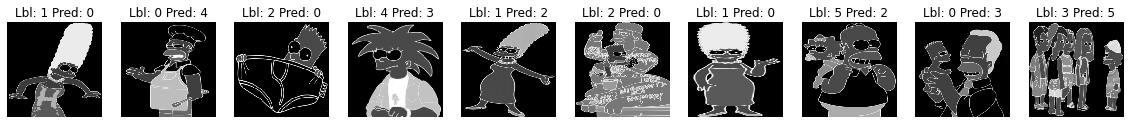

Processing  Both
(253, 400) (106, 400)
Evaluation of  Both
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        25
           1       0.67      0.60      0.63        10
           2       0.52      0.77      0.62        35
           3       0.33      0.08      0.12        13
           4       0.57      0.33      0.42        12
           5       0.44      0.36      0.40        11

    accuracy                           0.51       106
   macro avg       0.50      0.44      0.44       106
weighted avg       0.49      0.51      0.48       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


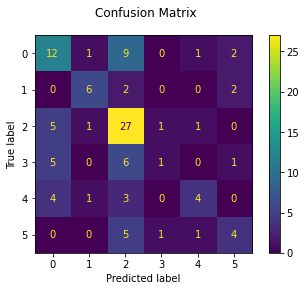

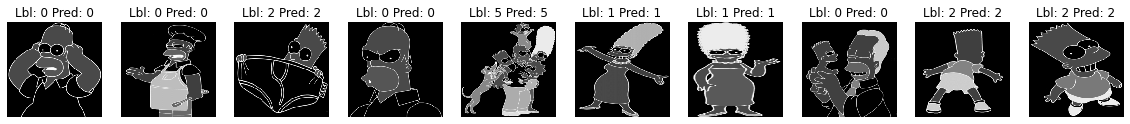

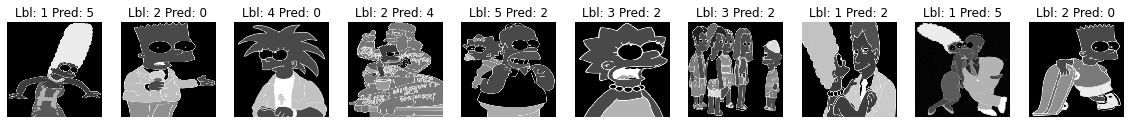

In [ ]:
K = 7
train_data = [train_feat_h,train_feat_v,train_feat_hv]
test_data = [test_feat_h,test_feat_v,test_feat_hv]
data_info = ['Horizontal Proj', 'Vertical Proj', 'Both']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  tree = RandomForestClassifier()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  tree.fit(train, y_train)
  predicted = tree.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste RandomForest Canny, Sobel e Laplace

Processing  Canny
(253, 40000) (106, 40000)
Evaluation of  Canny
              precision    recall  f1-score   support

           0       0.39      0.48      0.43        25
           1       0.00      0.00      0.00        10
           2       0.39      0.83      0.53        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.39       106
   macro avg       0.13      0.22      0.16       106
weighted avg       0.22      0.39      0.28       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


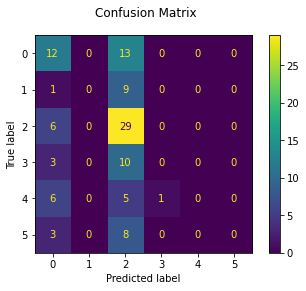

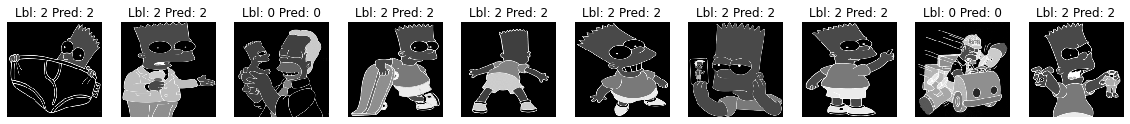

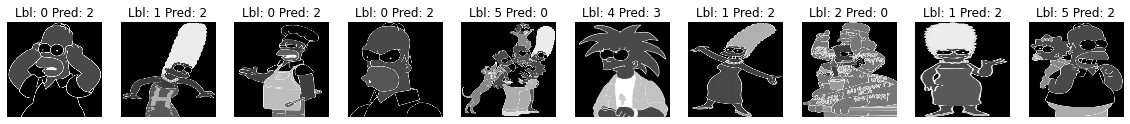

Processing  Sobel
(253, 40000) (106, 40000)
Evaluation of  Sobel
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        25
           1       0.00      0.00      0.00        10
           2       0.38      0.89      0.53        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.41       106
   macro avg       0.15      0.23      0.17       106
weighted avg       0.24      0.41      0.29       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


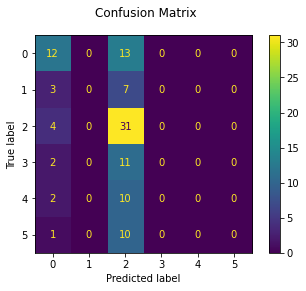

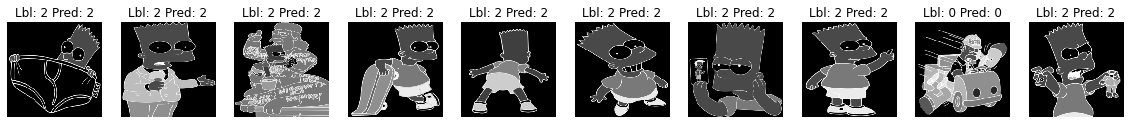

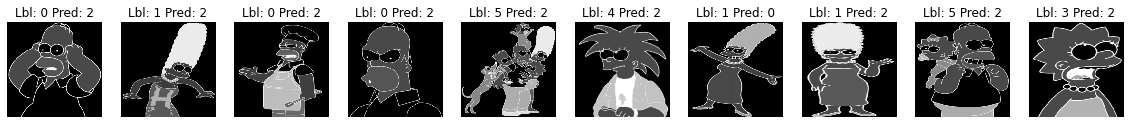

Processing  Laplace
(253, 40000) (106, 40000)
Evaluation of  Laplace
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        25
           1       0.00      0.00      0.00        10
           2       0.39      0.97      0.56        35
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        11

    accuracy                           0.41       106
   macro avg       0.15      0.22      0.16       106
weighted avg       0.25      0.41      0.28       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


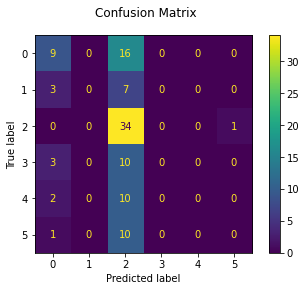

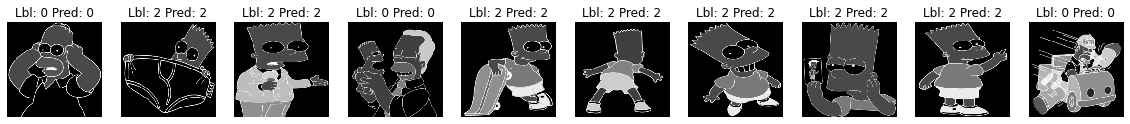

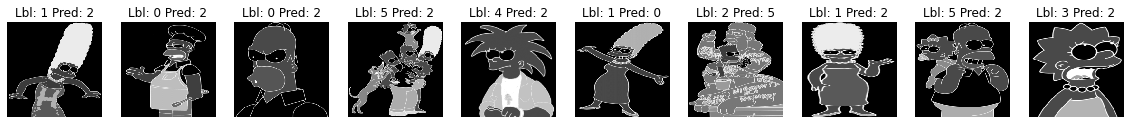

In [ ]:
K=7
train_data = [train_feat_canny,train_feat_sobel,train_feat_laplace]
test_data = [test_feat_canny,test_feat_sobel,test_feat_laplace]
data_info = ['Canny','Sobel','Laplace']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info)
  tree = RandomForestClassifier()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  tree.fit(train, y_train)
  predicted = tree.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste RandomForest LBP

Processing  LBP Histograma
(253, 10) (106, 10)
Evaluation of  LBP Histograma
              precision    recall  f1-score   support

           0       0.17      0.24      0.20        25
           1       0.33      0.10      0.15        10
           2       0.35      0.54      0.42        35
           3       0.20      0.08      0.11        13
           4       0.00      0.00      0.00        12
           5       0.75      0.27      0.40        11

    accuracy                           0.28       106
   macro avg       0.30      0.21      0.21       106
weighted avg       0.29      0.28      0.26       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


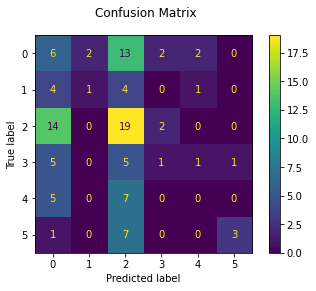

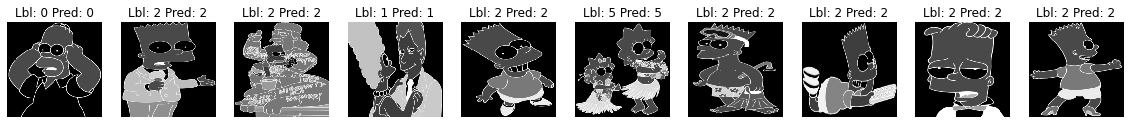

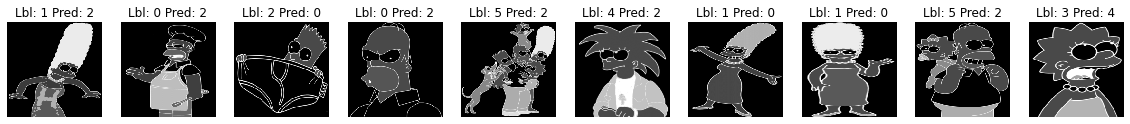

In [ ]:
K = 3
train_data = [lbp_htrain]
test_data = [lbp_htest]
data_info = ['LBP Histograma']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  tree = RandomForestClassifier()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  tree.fit(train, y_train)
  predicted = tree.predict(test)
  performance_evaluation(y_test,predicted,info)

##Teste RandomForest HOG

Processing  HOG Extraction
(253, 3780) (106, 3780)
Evaluation of  HOG Extraction
              precision    recall  f1-score   support

           0       0.40      0.48      0.44        25
           1       0.00      0.00      0.00        10
           2       0.45      0.89      0.60        35
           3       0.50      0.15      0.24        13
           4       0.00      0.00      0.00        12
           5       1.00      0.27      0.43        11

    accuracy                           0.45       106
   macro avg       0.39      0.30      0.28       106
weighted avg       0.41      0.45      0.37       106


['homer', 'marge', 'bart', 'lisa', 'maggie', 'family']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


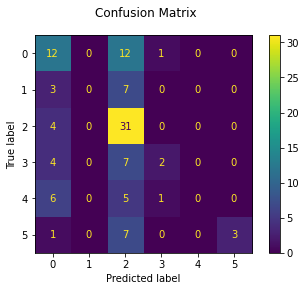

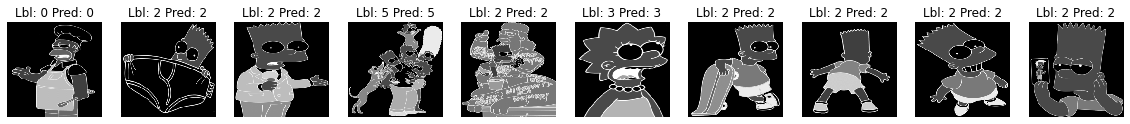

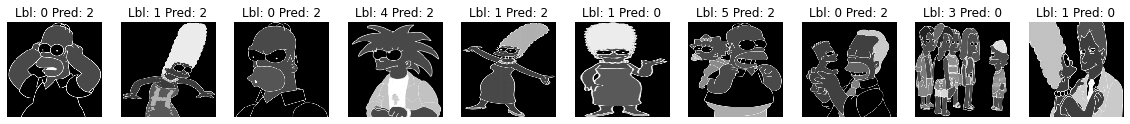

In [ ]:
K = 3
train_data = [Hog_train]
test_data = [Hog_test]
data_info = ['HOG Extraction']
for train,test,info in zip(train_data,test_data,data_info):
  print('Processing ', info )
  tree = RandomForestClassifier()
  
  #flatten
  train = train.reshape(train.shape[0],-1)
  test = test.reshape(test.shape[0],-1)

  print(train.shape, test.shape)
  tree.fit(train, y_train)
  predicted = tree.predict(test)
  performance_evaluation(y_test,predicted,info)